In [28]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import requests

# from citipy import citipy
# from config import weather_api_key

# import time
# from datetime import datetime

url = url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [29]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [30]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [31]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-16.792712970064642 -86.47795816361412
76.87429563562281 -74.61464919683529
40.09814899111291 174.89961224009915
-27.83720479434701 -1.6613716110294376
-71.43820116032708 63.96495295552742
14.571145855000935 -79.42811954979639
-18.390040683448404 33.278939889799545
89.458738292122 -42.07731190668747
65.30642926609869 -21.06752324686235
13.135616874371266 -90.08461796833285
-80.33013725996577 22.090688252871757
-4.174807802435211 -18.44108679884286
-50.573277116883176 -79.90908996007923
58.57917569585493 -83.91589130441629
74.79743980034729 80.74395165576612
-71.02572691085744 57.50775604503494
27.85303083712249 4.067607174258967
-78.16850705861069 -93.17177788117682
-76.02071101784308 -76.61777996761455
7.816248774349788 -118.15196704058343
25.657779417684097 -87.15626003507195
47.672670794101634 26.86207985708114
-66.342471496467 -83.9247230272625
-64.57148222893059 -95.35956729867257
7.721874366752147 8.90085922867351
2.519216516417785 -127.18123360474328
87.90070197236378 -146.54138

In [32]:
from citipy import citipy

In [33]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

632

In [34]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [35]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        #time.sleep(60) *code doesn't pull data w/ time.sleep*

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hualmay
Processing Record 2 of Set 1 | qaanaaq
Processing Record 3 of Set 1 | nikolskoye
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | san andres
Processing Record 7 of Set 1 | manica
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | hvammstangi
City not found. Skipping...
Processing Record 10 of Set 1 | acajutla
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | warqla
City not found. Skipping...
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | cabo san lucas
Processing Record 20 of Set 1 | mantua

Processing Record 38 of Set 4 | guerrero negro
Processing Record 39 of Set 4 | saint anthony
Processing Record 40 of Set 4 | bacuit
City not found. Skipping...
Processing Record 41 of Set 4 | pochutla
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | ruatoria
City not found. Skipping...
Processing Record 44 of Set 4 | patiala
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | tezu
Processing Record 48 of Set 4 | maniitsoq
Processing Record 49 of Set 4 | portadown
Processing Record 50 of Set 4 | thunder bay
Processing Record 1 of Set 5 | warri
Processing Record 2 of Set 5 | nouakchott
Processing Record 3 of Set 5 | spornoye
Processing Record 4 of Set 5 | prince rupert
Processing Record 5 of Set 5 | yar-sale
Processing Record 6 of Set 5 | kushmurun
Processing Record 7 of Set 5 | tantoyuca
Processing Record 8 of Set 5 | provideniya
Processing Record 9 of Set 5 | luderitz
Pr

Processing Record 26 of Set 8 | arlit
Processing Record 27 of Set 8 | kavaratti
Processing Record 28 of Set 8 | chimbote
Processing Record 29 of Set 8 | tibati
Processing Record 30 of Set 8 | asbury park
Processing Record 31 of Set 8 | tautira
Processing Record 32 of Set 8 | port hedland
Processing Record 33 of Set 8 | yining
Processing Record 34 of Set 8 | mikhaylovka
Processing Record 35 of Set 8 | tecali
Processing Record 36 of Set 8 | sambava
Processing Record 37 of Set 8 | novokruchininskiy
Processing Record 38 of Set 8 | chuy
Processing Record 39 of Set 8 | ialibu
Processing Record 40 of Set 8 | sile
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | tombouctou
Processing Record 44 of Set 8 | muscat
Processing Record 45 of Set 8 | miandoab
Processing Record 46 of Set 8 | bam
Processing Record 47 of Set 8 | weymouth
Processing Record 48 of Set 8 | qasigiannguit
Processing Record 49 of Set 8 | sorong
Processing Recor

Processing Record 12 of Set 12 | kiama
Processing Record 13 of Set 12 | katra
Processing Record 14 of Set 12 | yumen
Processing Record 15 of Set 12 | stornoway
Processing Record 16 of Set 12 | barrhead
Processing Record 17 of Set 12 | bukama
Processing Record 18 of Set 12 | broken hill
Processing Record 19 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 20 of Set 12 | carrickfergus
Processing Record 21 of Set 12 | zyryanka
Processing Record 22 of Set 12 | bizhbulyak
Processing Record 23 of Set 12 | ituporanga
Processing Record 24 of Set 12 | makat
Processing Record 25 of Set 12 | constitucion
Processing Record 26 of Set 12 | payo
Processing Record 27 of Set 12 | mehamn
Processing Record 28 of Set 12 | tazovskiy
Processing Record 29 of Set 12 | portsoy
Processing Record 30 of Set 12 | shaoguan
Processing Record 31 of Set 12 | bilma
Processing Record 32 of Set 12 | sale
Processing Record 33 of Set 12 | havelock
Processing Record 34 of Set 12 | wanxian
Processing Recor

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hualmay,-11.0964,-77.6139,80.42,74,77,9.51,PE,2023-04-04 21:19:12
1,Qaanaaq,77.4840,-69.3632,-14.24,81,0,1.43,GL,2023-04-04 21:19:12
2,Nikolskoye,59.7035,30.7861,33.69,99,100,4.09,RU,2023-04-04 21:19:12
3,Jamestown,42.0970,-79.2353,58.64,67,75,10.36,US,2023-04-04 21:16:40
4,San Andres,12.5847,-81.7006,84.22,70,40,13.80,CO,2023-04-04 21:19:13
5,Manica,49.0000,-1.1667,35.89,89,7,3.44,FR,2023-04-04 21:19:13
6,Upernavik,72.7868,-56.1549,-16.06,95,52,5.59,GL,2023-04-04 21:18:09
7,Acajutla,13.5928,-89.8275,87.78,54,6,10.31,SV,2023-04-04 21:19:13
8,Bredasdorp,-34.5322,20.0403,61.70,89,7,4.50,ZA,2023-04-04 21:17:10
9,Georgetown,5.4112,100.3354,80.55,83,20,1.14,MY,2023-04-04 21:16:48


In [37]:
# Reorder the columns in the dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hualmay,PE,2023-04-04 21:19:12,-11.0964,-77.6139,80.42,74,77,9.51
1,Qaanaaq,GL,2023-04-04 21:19:12,77.4840,-69.3632,-14.24,81,0,1.43
2,Nikolskoye,RU,2023-04-04 21:19:12,59.7035,30.7861,33.69,99,100,4.09
3,Jamestown,US,2023-04-04 21:16:40,42.0970,-79.2353,58.64,67,75,10.36
4,San Andres,CO,2023-04-04 21:19:13,12.5847,-81.7006,84.22,70,40,13.80
...,...,...,...,...,...,...,...,...,...
571,Neepawa,CA,2023-04-04 21:22:28,50.2289,-99.4664,21.60,86,100,14.76
572,Qaqortoq,GL,2023-04-04 21:22:29,60.7167,-46.0333,31.51,91,98,2.26
573,Camacha,PT,2023-04-04 21:19:25,33.0833,-16.3333,60.22,72,40,21.85
574,Xichang,CN,2023-04-04 21:22:29,27.8964,102.2634,53.13,66,6,1.97


In [38]:
# Create the output file (CSV).
output_data_file = "cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

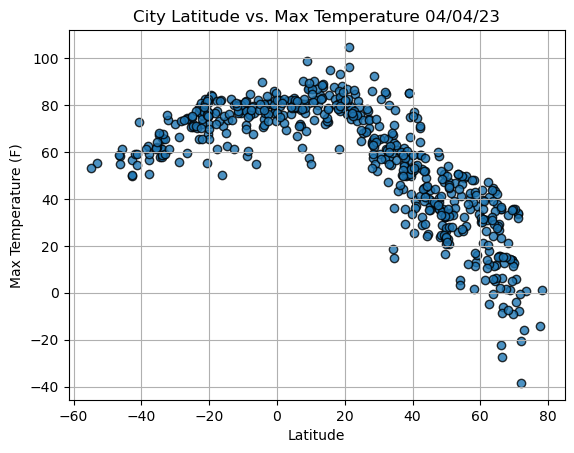

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

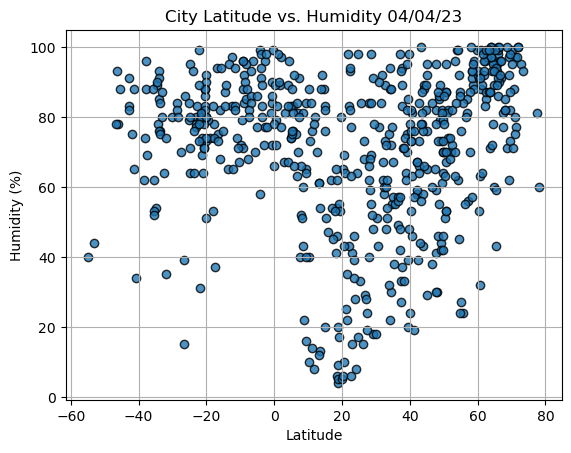

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

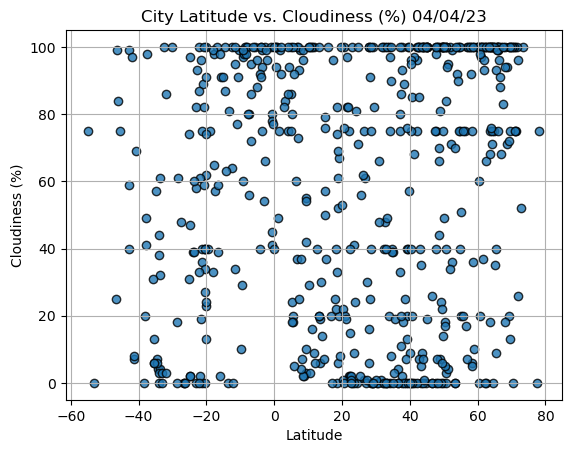

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

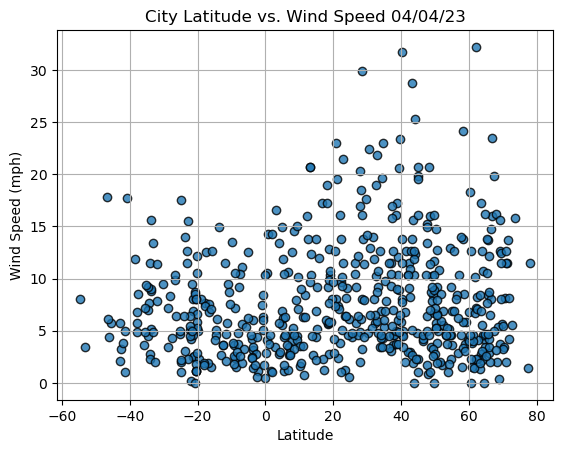

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [53]:
# Adding code to perform regression analysis
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2023-04-04 21:19:15
Lat                         -54.8
Lng                         -68.3
Max Temp                    53.26
Humidity                       40
Cloudiness                     75
Wind Speed                   8.05
Name: 13, dtype: object

In [54]:
# Checking code to display dataframe 
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2023-04-04 21:19:12,77.4840,-69.3632,-14.24,81,0,1.43
2,Nikolskoye,RU,2023-04-04 21:19:12,59.7035,30.7861,33.69,99,100,4.09
3,Jamestown,US,2023-04-04 21:16:40,42.0970,-79.2353,58.64,67,75,10.36
4,San Andres,CO,2023-04-04 21:19:13,12.5847,-81.7006,84.22,70,40,13.80
5,Manica,FR,2023-04-04 21:19:13,49.0000,-1.1667,35.89,89,7,3.44
...,...,...,...,...,...,...,...,...,...
571,Neepawa,CA,2023-04-04 21:22:28,50.2289,-99.4664,21.60,86,100,14.76
572,Qaqortoq,GL,2023-04-04 21:22:29,60.7167,-46.0333,31.51,91,98,2.26
573,Camacha,PT,2023-04-04 21:19:25,33.0833,-16.3333,60.22,72,40,21.85
574,Xichang,CN,2023-04-04 21:22:29,27.8964,102.2634,53.13,66,6,1.97


In [55]:
# Display first five rows of dataframe
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Qaanaaq,GL,2023-04-04 21:19:12,77.4840,-69.3632,-14.24,81,0,1.43
2,Nikolskoye,RU,2023-04-04 21:19:12,59.7035,30.7861,33.69,99,100,4.09
3,Jamestown,US,2023-04-04 21:16:40,42.0970,-79.2353,58.64,67,75,10.36
4,San Andres,CO,2023-04-04 21:19:13,12.5847,-81.7006,84.22,70,40,13.80
5,Manica,FR,2023-04-04 21:19:13,49.0000,-1.1667,35.89,89,7,3.44


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

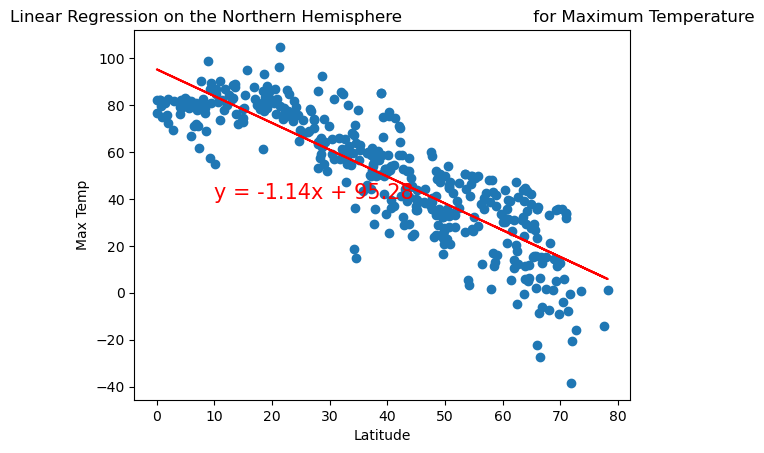

In [57]:
# Linear regression on the Northern Hemisphere [Lat vs Max Temp]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

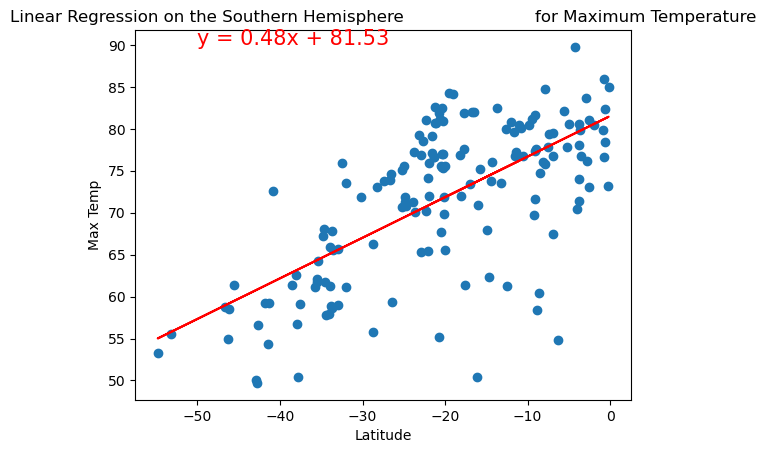

In [58]:
# Linear regression on the Southern Hemisphere [Lat vs Max Temp]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

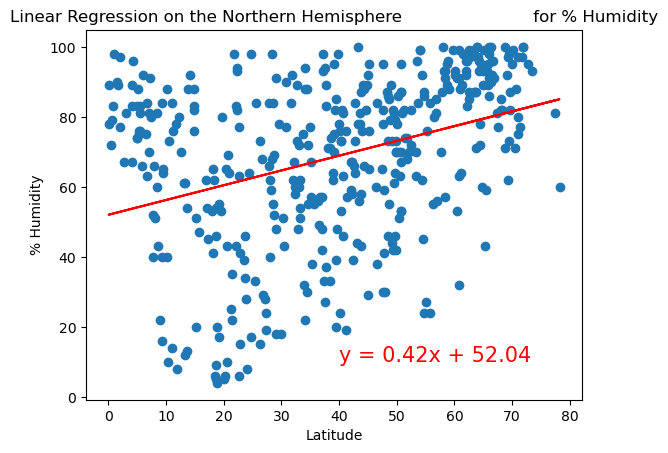

In [59]:
# Linear regression on the Northern Hemisphere [Lat vs % Humidity]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

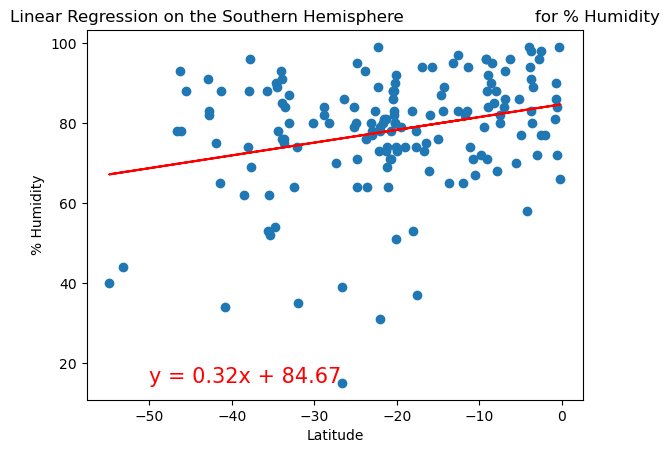

In [60]:
# Linear regression on the Southern Hemisphere [Lat vs % Humidity]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

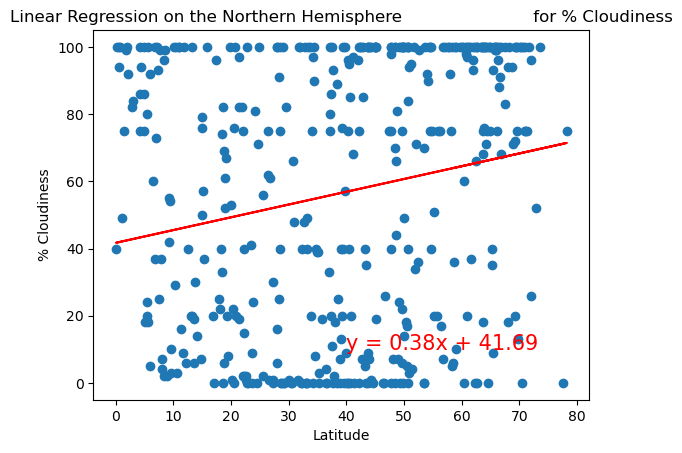

In [64]:
# Linear regression on the Northern Hemisphere [Lat vs Cloudiness]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

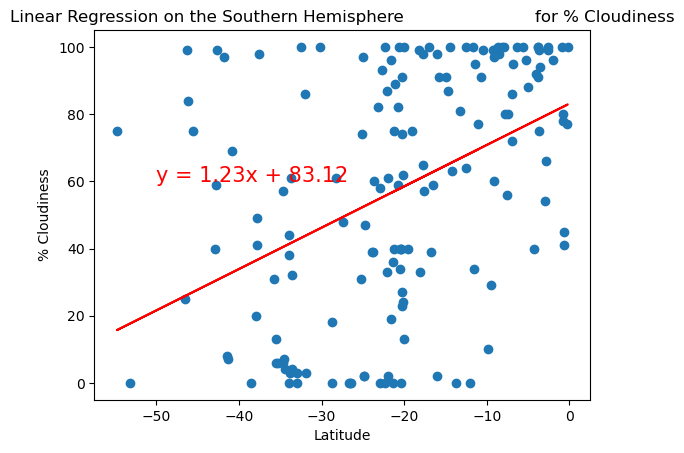

In [65]:
# Linear regression on the Southern Hemisphere [Lat vs Cloudiness]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

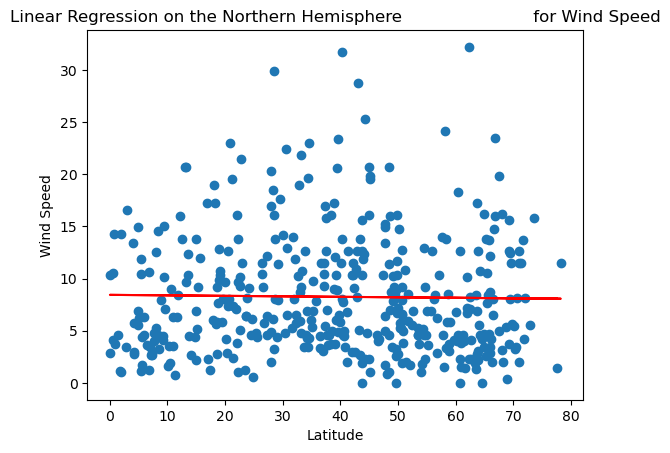

In [66]:
# Linear regression on the Northern Hemisphere [Lat vs Wind Speed]
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

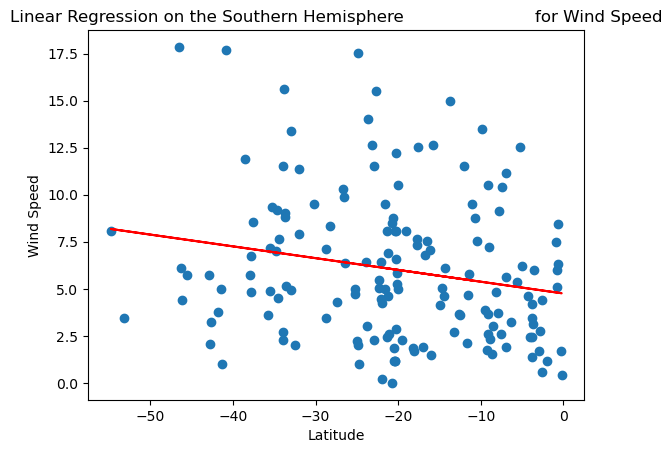

In [67]:
# Linear regression on the Southern Hemisphere [Lat vs Wind Speed]
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,60))